### Step 1 : Load and Explore the Data

In [ ]:
#Importing Dependencies
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

#Models
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings('ignore')

url = 'https://docs.google.com/spreadsheets/d/1RRs3Df-RqmM7lbNUOOx4uRwKNMRHquUf/export?format=csv&gid=661986139'

# Load the CSV file while skipping bad lines
df = pd.read_csv(url, on_bad_lines='skip')

# Check the shape and the first few rows
print(df.shape)
df.head()

(509, 22)


,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6
2,Jun-1982,1160.0,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.7,...,506.9,350.8,3561.5,1192.7,655.6,361.9,486.4,504.7,345.9,3547.0
3,Jul-1982,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.4,...,503.7,341.5,3553.9,1203.2,656.6,361.6,488.6,505.4,345.4,3560.6
4,Aug-1982,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.7,659.8,...,506.0,342.7,3581.8,1213.5,656.5,361.9,489.8,505.6,346.4,3573.6


In [ ]:
df.dtypes

,0
year,object
Original_Food retailing,float64
Original_ Household goods retailing,float64
"Original_Clothing, footwear and personal accessory retailing",float64
Original_Department stores,float64
Original_ Other retailing,float64
"Original_Cafes, restaurants and takeaway food services",float64
Original_Total (Industry),float64
Seasonally_Food retailing,float64
Seasonally_Household goods retailing,float64


In [ ]:
# Convert the year column into date format
df['year'] = pd.to_datetime(df['year'], format='%b-%Y').dt.year

**1. Understanding the Data**
The dataset contains various columns related to retailing across different categories, such as:

- Original: Raw data values.
- Seasonally: Adjusted for seasonal effects.
- Trend: Long-term trends in the data.
- Turnover: Total revenue for specific sectors.

In [ ]:
#Checking Null Values
df.isnull().sum()

,0
year,0
Original_Food retailing,0
Original_ Household goods retailing,0
"Original_Clothing, footwear and personal accessory retailing",0
Original_Department stores,0
Original_ Other retailing,0
"Original_Cafes, restaurants and takeaway food services",0
Original_Total (Industry),0
Seasonally_Food retailing,0
Seasonally_Household goods retailing,0


In [ ]:
df.columns

Index(['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)',
       'Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)'],
      dtype='object')

In [ ]:
# Strip whitespace from column names
df=df.rename(columns={
       'Original_Food retailing':'Original_Food_retailing',
       'Original_ Household goods retailing':'Original_Household_goods_retailing',
       'Original_Clothing, footwear and personal accessory retailing':'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department stores':'Original_Department_stores',
    'Original_ Other retailing':'Original_Other_retailing',
       'Original_Cafes, restaurants and takeaway food services':'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total (Industry)':'Original_Total_Industry',
       'Seasonally_Food retailing':'Seasonally_Food_retailing',
       'Seasonally_Household goods retailing':'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing':'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department stores':'Seasonally_Department_stores',
    'Seasonally_Other retailing':'Seasonally_Other_retailing',
       'Seasonally_Cafes, restaurants and takeaway food services':'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total (Industry)': 'Seasonally_Total_Industry',
       'Turnover ;  Total (State) ;  Food retailing ;':'Trend_Food_retailing',
       'Trend_Household goods retailing':'Trend_Household_goods_retailing',
       'Trend_Clothing, footwear and personal accessory retailing':'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department stores':'Trend_Department_stores',
       'Trend_Other retailing':'Trend_Other_retailing',
       'Trend_Cafes, restaurants and takeaway food services':'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total (Industry)':  'Trend_Total(Industry)'
       })
print(df.columns)
df.head(2)

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)'],
      dtype='object')


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [ ]:
main_df = df.copy()
print(main_df.shape)

(509, 22)


In [ ]:
#Create Clean DataFrame , Remove Null values
main_df= main_df.dropna()
main_df.shape

(481, 22)

In [ ]:
main_df.tail()

,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
504,2024,13749.8,5195.6,2807.9,1728.6,5213.8,5325.3,34020.9,14285.9,5689.7,...,5611.4,5398.8,35811.4,14330.6,5710.9,2979.3,1886.0,5586.1,5390.3,35883.3
505,2024,14189.2,5510.7,3021.8,1806.4,5535.7,5391.6,35455.4,14383.1,5755.8,...,5621.1,5388.4,36002.2,14371.7,5743.4,2985.1,1887.4,5623.3,5393.6,36004.6
506,2024,13699.6,5841.5,2917.2,1859.0,5333.5,5115.3,34766.2,14420.0,5818.8,...,5671.4,5385.6,36187.1,14415.7,5773.6,2992.5,1889.1,5661.0,5397.2,36129.1
507,2024,14115.7,5565.5,2770.6,1746.4,5539.6,5431.5,35169.4,14447.2,5815.2,...,5679.5,5385.3,36207.3,14460.4,5798.4,3001.6,1891.4,5697.2,5401.8,36250.9
508,2024,14593.1,5596.6,2812.4,1699.7,5673.8,5554.8,35930.3,14530.7,5797.6,...,5753.0,5437.2,36474.7,14504.8,5826.5,3008.4,1893.8,5735.2,5407.9,36376.4


In [ ]:
main_df.isnull().sum()

,0
year,0
Original_Food_retailing,0
Original_Household_goods_retailing,0
Original_Clothing_footwear__personal_accessory_retailing,0
Original_Department_stores,0
Original_Other_retailing,0
Original_Cafes_restaurants_takeaway_food_services,0
Original_Total_Industry,0
Seasonally_Food_retailing,0
Seasonally_Household_goods_retailing,0


**Our Data is clean and ready to process for Analysis and Machine Learning Models**

In [ ]:
main_df['year'].dtypes

dtype('int32')

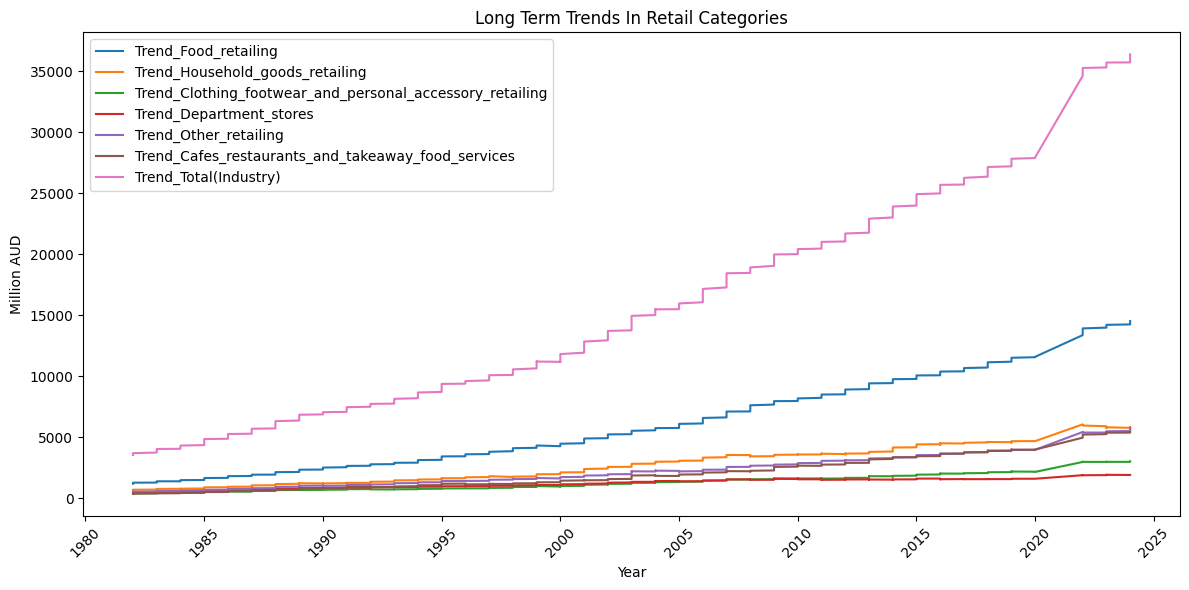

In [ ]:
#Line plots to show trends over the years Trends Over Time:
# Convert 'year' to datetime format for proper plotting
main_df['date'] = pd.to_datetime(main_df['year'].astype(str) + '-01-01')

# Set up the figure and axes
figure, axes = plt.subplots(figsize=(12, 6))  # Adjust the figure size
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Define columns to plot
columns_to_plot = [
    'Trend_Food_retailing',
    'Trend_Household_goods_retailing',
    'Trend_Clothing_footwear_and_personal_accessory_retailing',
    'Trend_Department_stores',
    'Trend_Other_retailing',
    'Trend_Cafes_restaurants_and_takeaway_food_services',
    'Trend_Total(Industry)'
]

# Set title and labels
plt.title('Long Term Trends In Retail Categories')
plt.ylabel('Million AUD')
plt.xlabel('Year')
plt.xticks(rotation=45)

# Plot each trend
for column in columns_to_plot:
    plt.plot(main_df['date'], main_df[column], label=column)

# Adjust x-ticks to show every 5 years
axes.xaxis.set_major_locator(mdates.YearLocator(5))  # Set major ticks to every 5 years

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

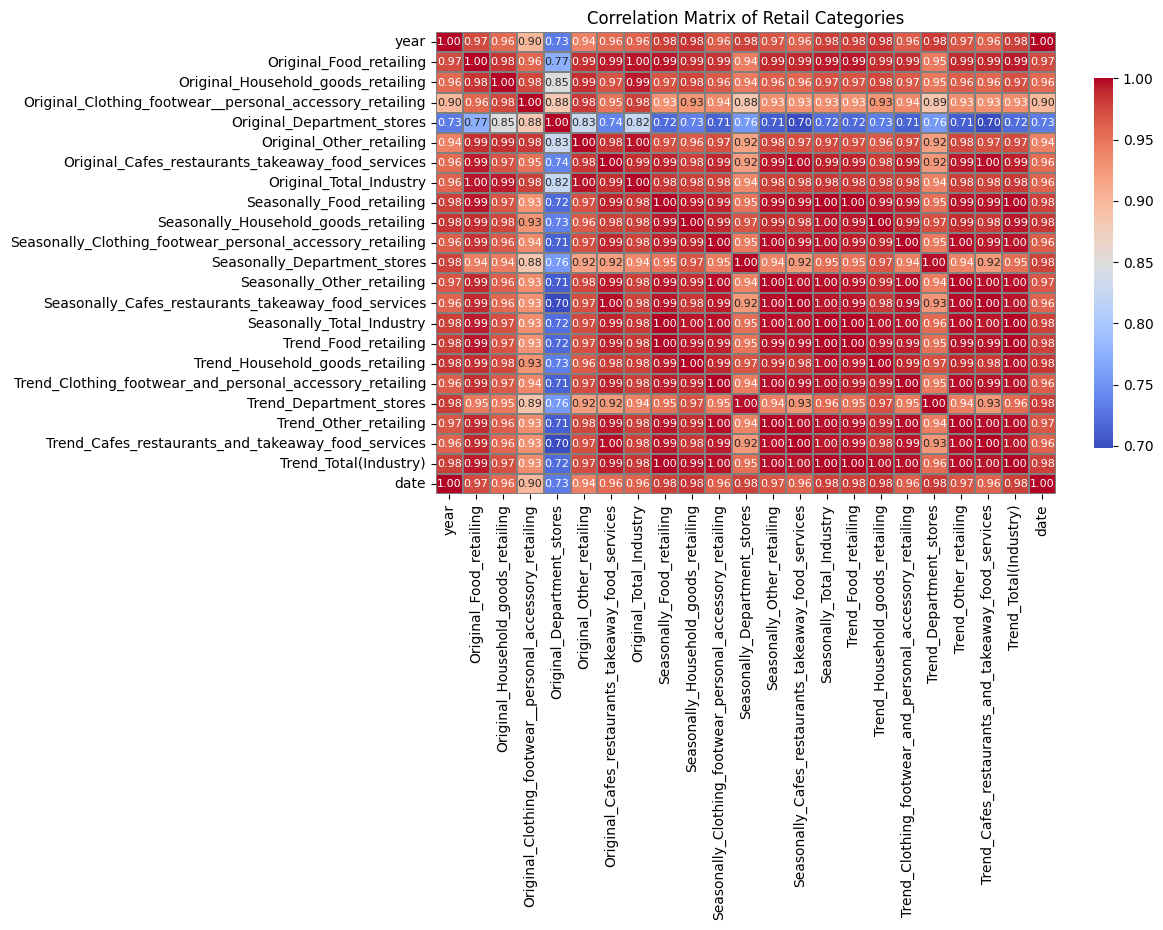

In [ ]:
# Correlation Analysis
correlation_data = main_df.corr()
plt.figure(figsize=(10, 6))

# Correlation Heatmap with smaller font size for annotations
sns.heatmap(correlation_data,
            annot=True,              # Display the correlation values
            cmap='coolwarm',        # Color map
            fmt=".2f",              # Format for the annotation text
            linewidths=.10,          # Lines between squares
            linecolor='gray',       # Color of the lines
            cbar_kws={"shrink": .8},  # Adjust color bar size
            annot_kws={"size": 8}   # Set annotation font size
           )

plt.title('Correlation Matrix of Retail Categories')
plt.show()

**Correlation Matrix**
The correlation matrix reveals key relationships among various retail sectors, both original and seasonally adjusted:

**Strong Positive Correlations:**

- **Food Retailing:**
Original and seasonally adjusted food retailing have a very high correlation (0.994), indicating consistent trends.

- **Total Industry:**
Highly correlated with Original Food Retailing (0.993) and Original Other Retailing (0.995), suggesting these categories significantly impact overall

**performance.**

- **Seasonal Patterns:**
Seasonally adjusted figures closely match their original counterparts, such as Seasonally Adjusted Household Goods Retailing (0.978), indicating strong underlying trends despite seasonal effects.

- **Moderate Correlations:**
Department Stores: Show lower correlations (0.724 to 0.815) with other categories, suggesting unique market dynamics.

- **Significant Relationships:**

Other Retailing: Strong correlations with most sectors (e.g., 0.987 with Household Goods) imply that changes in one category can affect others.

**Conclusion:**

The matrix underscores the interconnectedness of retail sectors, with strong relationships in food retailing and the importance of seasonal trends for better forecasting and strategic planning.





**Step 2 : Pre-Processing Data : Data Standardization**

**Trial Model 1 : Random Forest Model**

In [ ]:
#Step 1: Normalize /  Standardization the data
s_df = main_df.copy()

# Identify numeric columns (excluding datetime columns)
numeric_cols = s_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numeric columns
s_df[numeric_cols] = scaler.fit_transform(s_df[numeric_cols])

# Check the transformed DataFrame
s_df.head(2)

,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry),date
0,1982,-1.278397,-1.365391,-1.251738,-1.435592,-1.277819,-1.202613,-1.310552,-1.285302,-1.356190,...,-1.201811,-1.319044,-1.283580,-1.355938,-1.327036,-1.841625,-1.290202,-1.203081,-1.318189,1982-01-01
1,1982,-1.281603,-1.340480,-1.214017,-1.351766,-1.272500,-1.202839,-1.299091,-1.282129,-1.359408,...,-1.204453,-1.318021,-1.281234,-1.355115,-1.328091,-1.836914,-1.290358,-1.204063,-1.317016,1982-01-01


In [ ]:
# Step 2: Prepare the features and target
X = s_df[['year']]
y = s_df['Seasonally_Total_Industry']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluation Metrics:
MAE: 0.02410110351726418
MSE: 0.0010397432002944881
R²: 0.9991383893623058
RMSE: 0.032245049236967964
Predicted Turnover for Seasonally_Total_Industry for 2025: 2.42


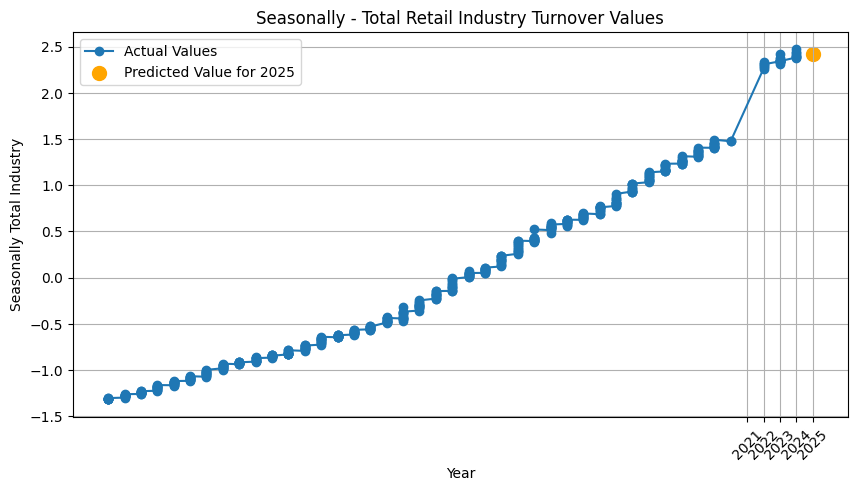

In [ ]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Evaluation Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)
print('RMSE:', rmse)

# Step 6: Predict for 2025
future_years = np.array([[2025]])
predicted_value = model.predict(future_years)

# Display the prediction
print(f'Predicted Turnover for Seasonally_Total_Industry for 2025: {predicted_value[0]:.2f}')

# Plotting the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(s_df['year'], s_df['Seasonally_Total_Industry'], label='Actual Values', marker='o')
plt.scatter(2025, predicted_value, color='orange', label='Predicted Value for 2025', s=100)

plt.title('Seasonally - Total Retail Industry Turnover Values')
plt.xlabel('Year')
plt.ylabel('Seasonally Total Industry')
plt.xticks(np.arange(2021, 2026))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Summary of Evaluation Metrics:**

**Mean Absolute Error (MAE): 0.0241**

Indicates the average prediction error is very low, suggesting high accuracy.

**Mean Squared Error (MSE): 0.0010**

Reflects minimal squared error, confirming precise predictions with minimal variability.

**R-squared (R²): 0.9991**

Signifies that 99.91% of the variance in the target variable is explained by the model, indicating an excellent fit.

**Root Mean Squared Error (RMSE): 0.0322**

Shows the average error magnitude is small, reinforcing the model's accuracy.

**Prediction for 2025:**

Predicted Turnover: 2.42
Forecasts a turnover of 2.42 units in 2025, providing a specific target for future planning.

**Overall:**

The model demonstrates exceptional performance, with very low error metrics and a strong R² value, indicating high reliability in predicting future turnover.

**Getting the Prediction value of All Seasonal Categories with Actual data Non-Transformed**

In [ ]:
# Step 2: Prepare the features and target
X = s_df[['year']]
y = s_df['Seasonally_Food_retailing']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluation Metrics:
MAE: 0.024583740560147505
MSE: 0.0010722544279414376
R²: 0.9991031918244959
RMSE: 0.032745296272005814
Predicted Turnover for Seasonally_Food_retailing for 2025: 2.35


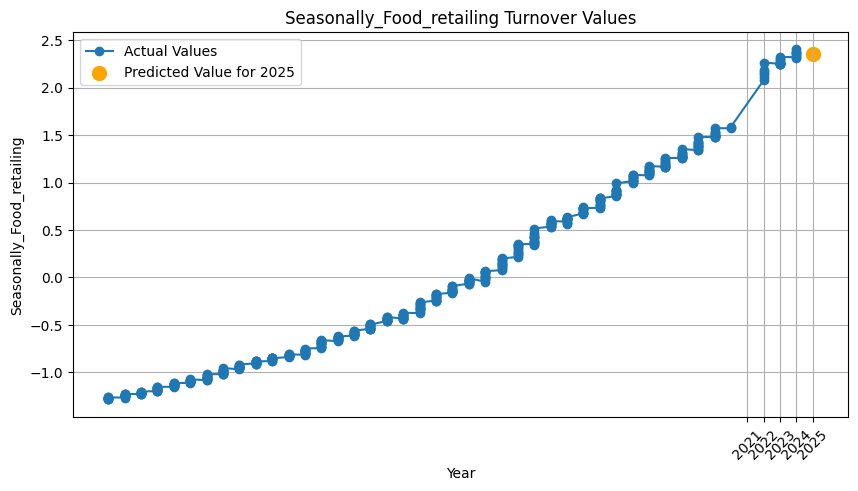

In [ ]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Evaluation Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)
print('RMSE:', rmse)

# Step 6: Predict for 2025
future_years = np.array([[2025]])
predicted_value = model.predict(future_years)

# Display the prediction
print(f'Predicted Turnover for Seasonally_Food_retailing for 2025: {predicted_value[0]:.2f}')

# Plotting the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(s_df['year'], s_df['Seasonally_Food_retailing'], label='Actual Values', marker='o')
plt.scatter(2025, predicted_value, color='orange', label='Predicted Value for 2025', s=100)

plt.title('Seasonally_Food_retailing Turnover Values')
plt.xlabel('Year')
plt.ylabel('Seasonally_Food_retailing')
plt.xticks(np.arange(2021, 2026))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
main_df.columns

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)', 'date'],
      dtype='object')

In [ ]:
# Get the actual value for 2024 and store it
actual_2024_value = main_df.loc[main_df['year'] == 2024, category].values[0]
actual_2024_value

35726.1

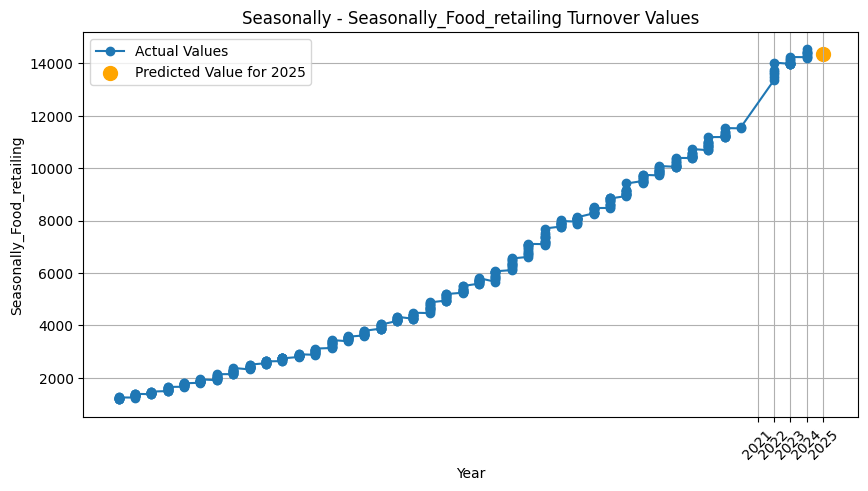

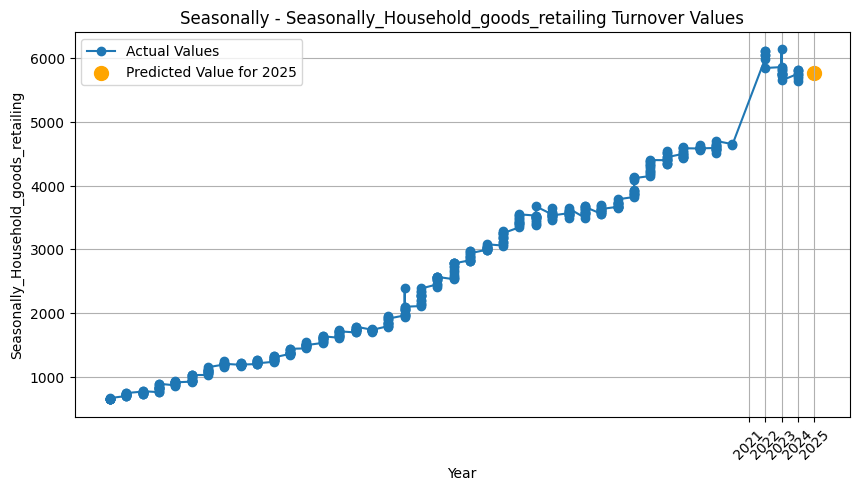

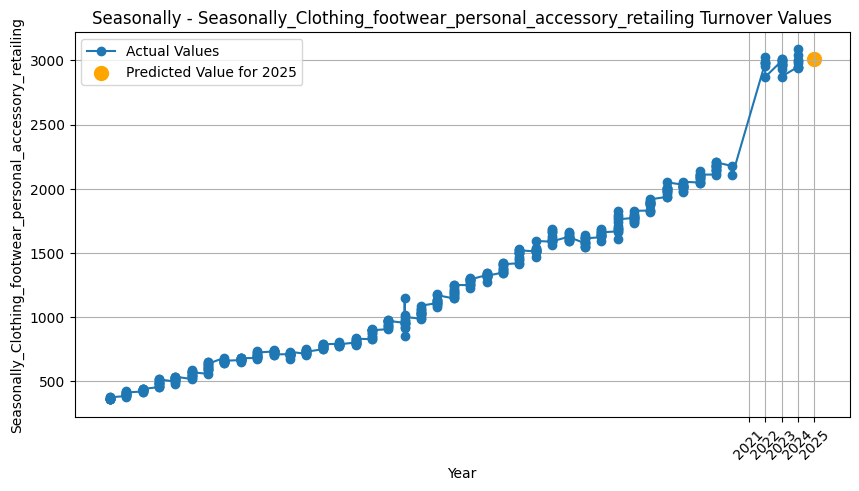

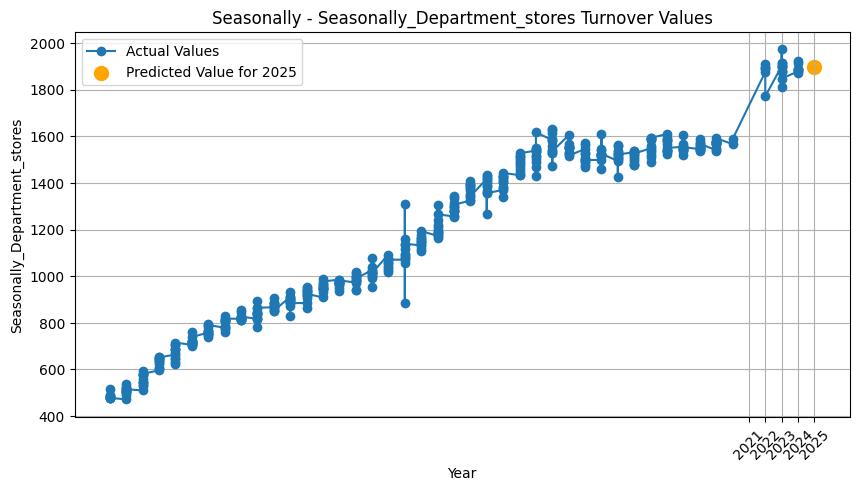

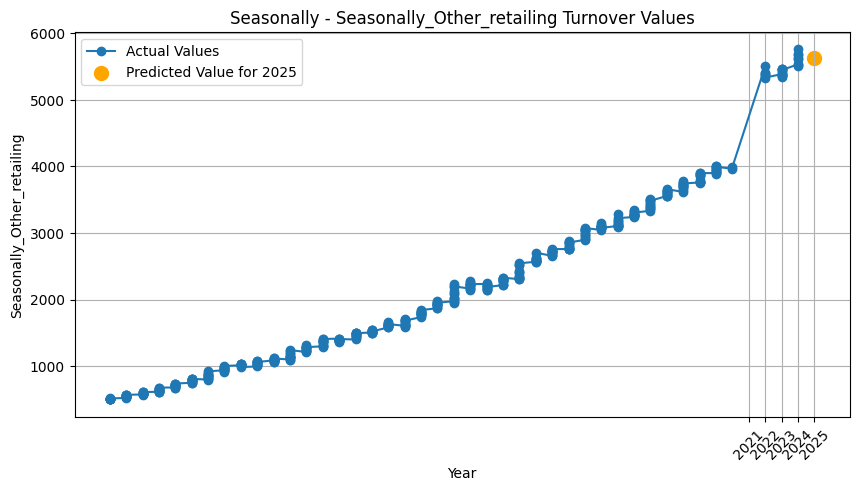

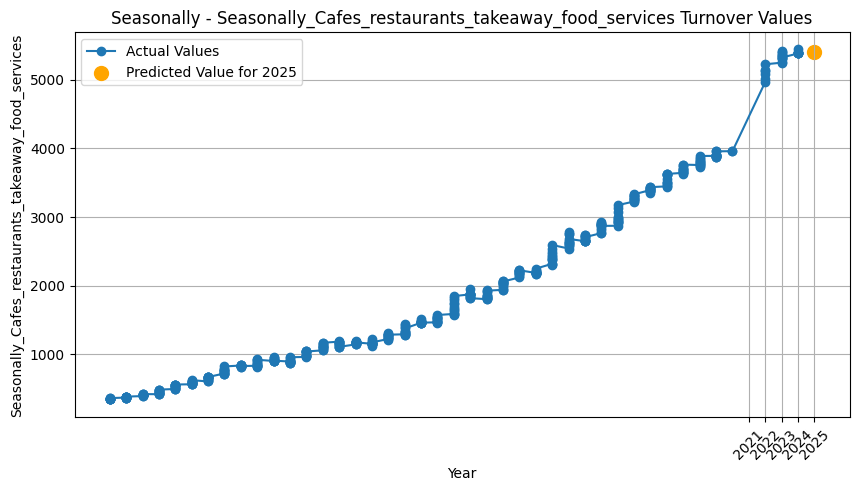

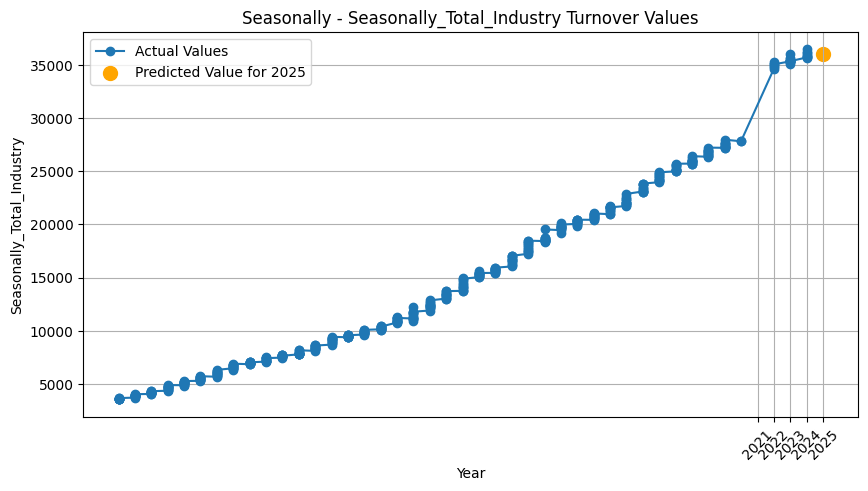

,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
MAE,89.099385,54.459772,26.437811,26.561176,35.220297,37.054921,209.669225
MSE,14084.821098,6521.164924,1534.238286,1797.280127,2081.140878,2711.381365,78690.374617
R2,0.999103,0.997387,0.997189,0.989673,0.998989,0.998748,0.999138
RMSE,118.679489,80.75373,39.169354,42.394341,45.619523,52.070926,280.518047
2024 Turnover,14237.2,5753.8,2948.4,1878.1,5529.8,5379.0,35726.1
2025 Prediction,14360.65,5769.68,3013.27,1896.16,5621.78,5396.39,36057.90


In [ ]:
# List of categories
categories = [
    'Seasonally_Food_retailing',
    'Seasonally_Household_goods_retailing',
    'Seasonally_Clothing_footwear_personal_accessory_retailing',
    'Seasonally_Department_stores',
    'Seasonally_Other_retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services',
    'Seasonally_Total_Industry'
]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(index=['MAE', 'MSE', 'R2', 'RMSE', '2024 Turnover','2025 Prediction'], columns=categories)

# Loop through each category
for category in categories:
    # Step 2: Prepare the features and target
    X = main_df[['year']]
    y = main_df[category]

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 4: Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    results_df.loc['MAE', category] = mae
    results_df.loc['MSE', category] = mse
    results_df.loc['R2', category] = r2
    results_df.loc['RMSE', category] = rmse

    # Step 6: Predict for 2025
    future_years = np.array([[2025]])
    predicted_value = model.predict(future_years)

    # Get the actual value for 2024 and store it
    actual_2024_value = main_df.loc[main_df['year'] == 2024, category]

    if not actual_2024_value.empty:
        results_df.loc['2024 Turnover', category] = actual_2024_value.values[0]
    else:
        results_df.loc['2024 Turnover', category] = np.nan  # Or handle as needed

    # Store the prediction
    results_df.loc['2025 Prediction', category] = f"{predicted_value[0]:.2f}"

    # (Optional) Plotting the actual and predicted values for each category
    plt.figure(figsize=(10, 5))
    plt.plot(main_df['year'], main_df[category], label='Actual Values', marker='o')
    plt.scatter(2025, predicted_value, color='orange', label='Predicted Value for 2025', s=100)

    plt.title(f'Seasonally - {category} Turnover Values')
    plt.xlabel('Year')
    plt.ylabel(category)
    plt.xticks(np.arange(2021, 2026))
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the results DataFrame
results_df


In [ ]:
# Create a mapping of long column names to shorter names
name_mapping = {
    'Seasonally_Food_retailing': 'Food Retailing',
    'Seasonally_Household_goods_retailing': 'Household Goods',
    'Seasonally_Clothing_footwear_personal_accessory_retailing': 'Clothing & Accessories',
    'Seasonally_Department_stores': 'Department Stores',
    'Seasonally_Other_retailing': 'Other Retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services': 'Cafes & Restaurants',
    'Seasonally_Total_Industry': 'Total Industry'
}

# Rename the columns in the results DataFrame
results_df.rename(columns=name_mapping, inplace=True)

# Display the modified DataFrame
print("Random Forest Model Evaluation Matrics for Seasonally Adjusted Data")
results_df

Random Forest Model Evaluation Matrics for Seasonally Adjusted Data


,Food Retailing,Household Goods,Clothing & Accessories,Department Stores,Other Retailing,Cafes & Restaurants,Total Industry
MAE,89.099385,54.459772,26.437811,26.561176,35.220297,37.054921,209.669225
MSE,14084.821098,6521.164924,1534.238286,1797.280127,2081.140878,2711.381365,78690.374617
R2,0.999103,0.997387,0.997189,0.989673,0.998989,0.998748,0.999138
RMSE,118.679489,80.75373,39.169354,42.394341,45.619523,52.070926,280.518047
2024 Turnover,14237.2,5753.8,2948.4,1878.1,5529.8,5379.0,35726.1
2025 Prediction,14360.65,5769.68,3013.27,1896.16,5621.78,5396.39,36057.90


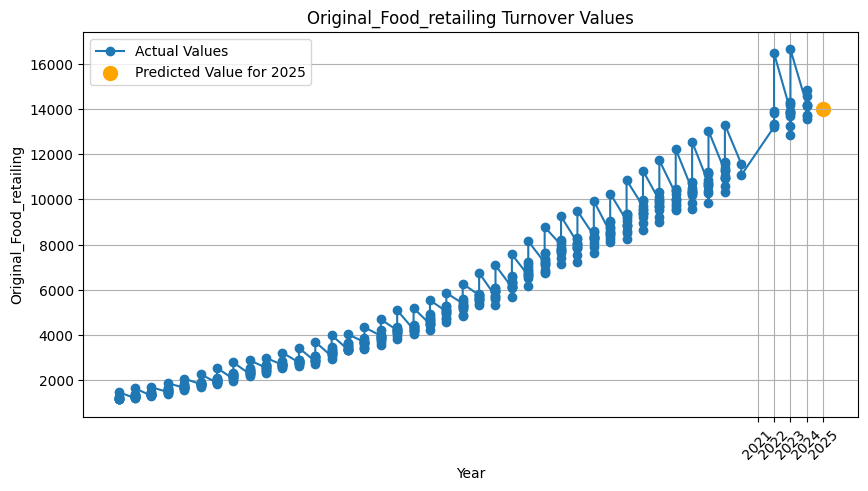

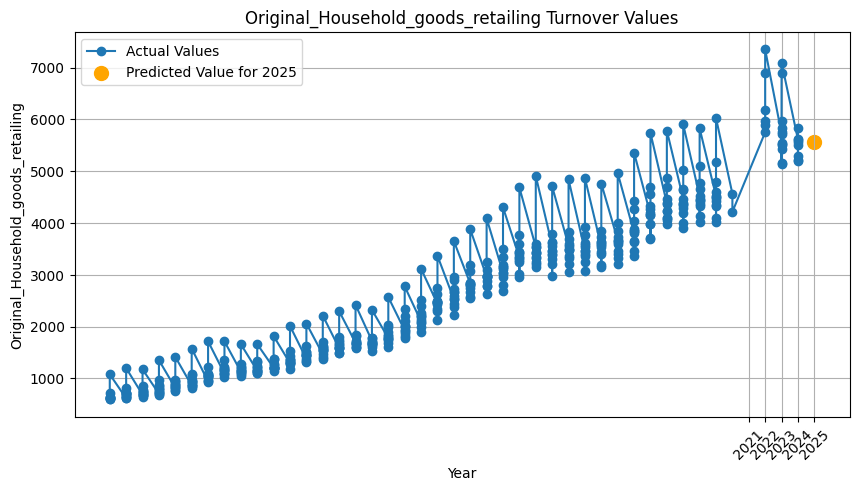

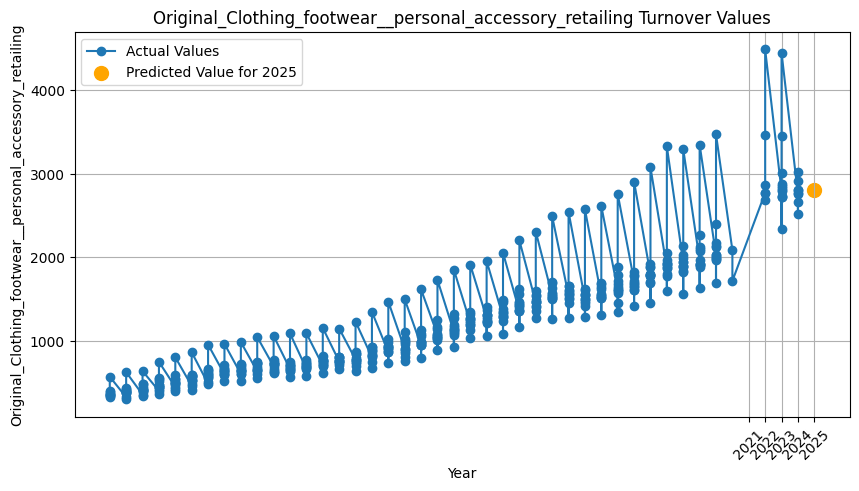

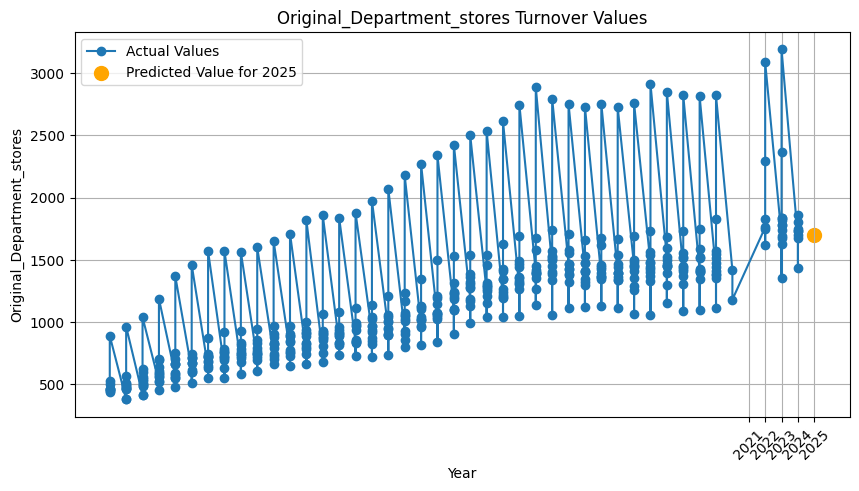

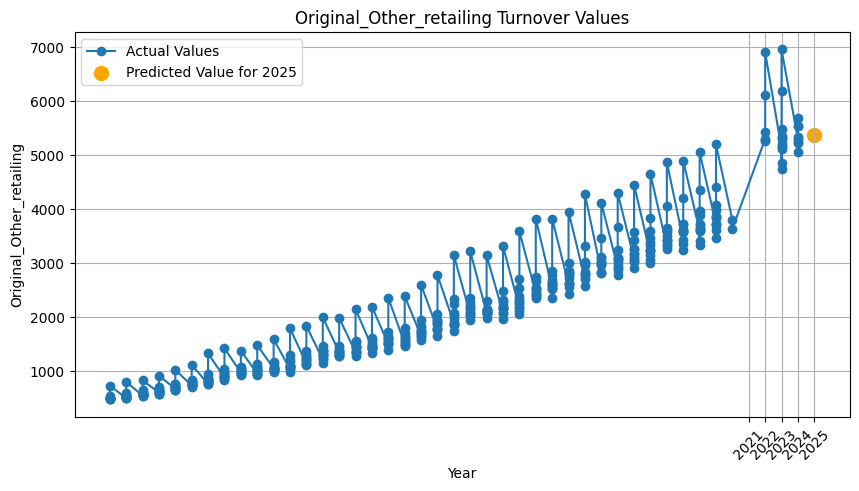

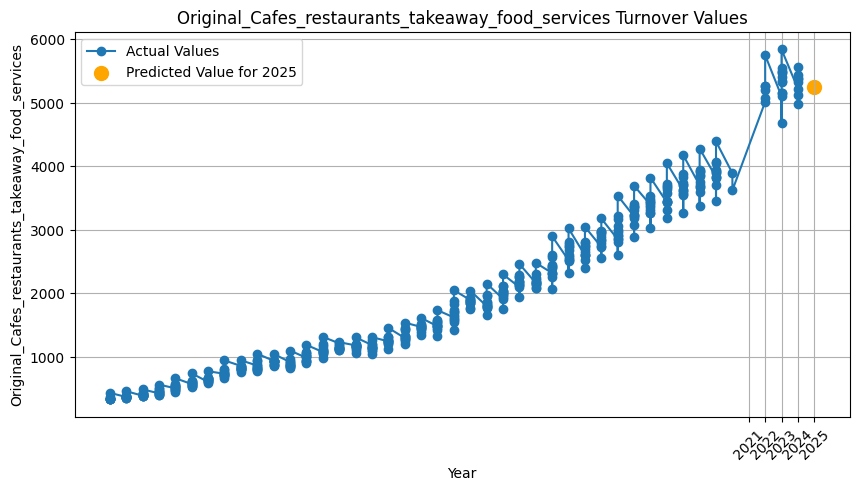

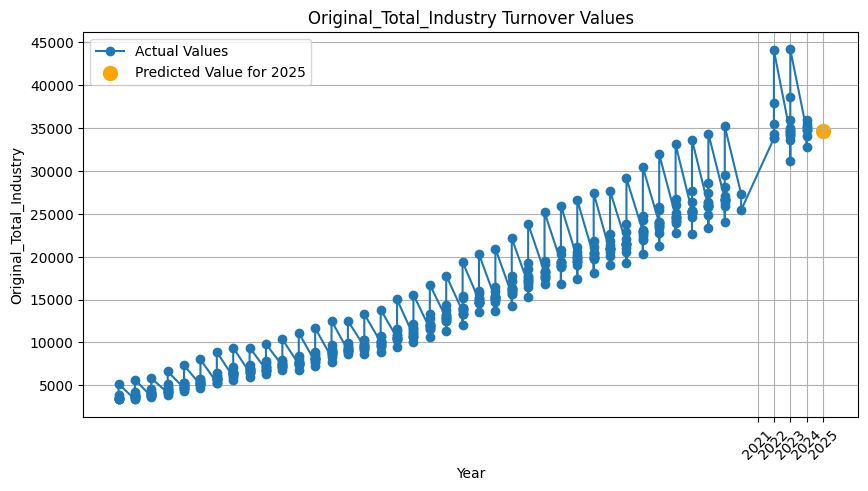

Random Forest Model Evaluation Matrics for Original Raw Data


,Food Retailing,Household Goods,Clothing & Accessories,Department Stores,Other Retailing,Cafes & Restaurants,Total Industry
MAE,322.343601,270.345289,172.902317,245.837863,216.902814,103.201008,1258.089329
MSE,381270.802455,186350.742258,120731.00248,168985.564848,148183.892042,26075.194255,5106029.149308
R2,0.977362,0.932259,0.83423,0.502484,0.935709,0.988469,0.949647
RMSE,617.471297,431.683614,347.463671,411.078539,384.946609,161.478154,2259.65244
2024 Turnover,14188.2,5611.9,2757.7,1672.6,5285.4,5219.1,34734.9
2025 Prediction,14014.04,5563.12,2806.98,1698.70,5369.06,5240.86,34692.75


In [ ]:
# List of categories
categories = [
        'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry'
]

# Initialize a DataFrame to store results
original_results_df = pd.DataFrame(index=['MAE', 'MSE', 'R2', 'RMSE', '2024 Turnover','2025 Prediction'], columns=categories)

# Loop through each category
for category in categories:
    # Step 2: Prepare the features and target
    X = main_df[['year']]
    y = main_df[category]

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 4: Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    original_results_df.loc['MAE', category] = mae
    original_results_df.loc['MSE', category] = mse
    original_results_df.loc['R2', category] = r2
    original_results_df.loc['RMSE', category] = rmse

    # Step 6: Predict for 2025
    future_years = np.array([[2025]])
    predicted_value = model.predict(future_years)

    # Get the actual value for 2024 and store it
    actual_2024_value = main_df.loc[main_df['year'] == 2024, category]

    if not actual_2024_value.empty:
        original_results_df.loc['2024 Turnover', category] = actual_2024_value.values[0]
    else:
        original_results_df.loc['2024 Turnover', category] = np.nan  # Or handle as needed

    # Store the prediction
    original_results_df.loc['2025 Prediction', category] = f"{predicted_value[0]:.2f}"

    # (Optional) Plotting the actual and predicted values for each category
    plt.figure(figsize=(10, 5))
    plt.plot(main_df['year'], main_df[category], label='Actual Values', marker='o')
    plt.scatter(2025, predicted_value, color='orange', label='Predicted Value for 2025', s=100)

    plt.title(f'{category} Turnover Values')
    plt.xlabel('Year')
    plt.ylabel(category)
    plt.xticks(np.arange(2021, 2026))
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a mapping of long column names to shorter names
name_mapping = {
    'Original_Food_retailing': 'Food Retailing',
    'Original_Household_goods_retailing': 'Household Goods',
    'Original_Clothing_footwear__personal_accessory_retailing': 'Clothing & Accessories',
    'Original_Department_stores': 'Department Stores',
    'Original_Other_retailing': 'Other Retailing',
    'Original_Cafes_restaurants_takeaway_food_services': 'Cafes & Restaurants',
    'Original_Total_Industry': 'Total Industry'
}

# Rename the columns in the results DataFrame
original_results_df.rename(columns=name_mapping, inplace=True)

# Display the results DataFrame
print("Random Forest Model Evaluation Matrics for Original Raw Data")
original_results_df

**Model Trial 2: Time Series Forecasting Using LSTM**

LSTM (Long Short-Term Memory) is chosen for time series forecasting due to its ability to learn long-term dependencies, making it suitable for sequential data like retail turnover.

In [ ]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(main_df[['Original_Food_retailing']])

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=1)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predictions
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print("Mean Squared Error:", mse)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1205
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0999 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0660 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0393 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0282 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254  
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [ ]:
# List of categories
categories = [
    'Seasonally_Food_retailing',
    'Seasonally_Household_goods_retailing',
    'Seasonally_Clothing_footwear_personal_accessory_retailing',
    'Seasonally_Department_stores',
    'Seasonally_Other_retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services',
    'Seasonally_Total_Industry'
]

# Initialize a DataFrame to store results
lstm_results_df = pd.DataFrame(index=['MAE', 'MSE', 'R2', 'RMSE', '2024 Turnover', '2025 Prediction'], columns=categories)

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Loop through each category
for category in categories:
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(main_df[[category]])

    # Create sequences
    X, y = create_sequences(scaled_data, time_step=1)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluate the model
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    r2 = r2_score(y_test_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    lstm_results_df.loc['MAE', category] = f"{mae:.2f}"
    lstm_results_df.loc['MSE', category] = f"{mse:.2f}"
    lstm_results_df.loc['R2', category] = f"{r2:.2f}"
    lstm_results_df.loc['RMSE', category] = f"{rmse:.2f}"

    # Get the actual value for 2024 and store it
    if not main_df[main_df['year'] == 2024].empty:
        actual_2024_value = main_df.loc[main_df['year'] == 2024, category].values[0]
        lstm_results_df.loc['2024 Turnover', category] = f"{actual_2024_value:.2f}"
    else:
        lstm_results_df.loc['2024 Turnover', category] = 'No data'

    # Predict for 2025 (using the last known value)
    last_value = scaled_data[-1]
    future_years = np.array([[last_value[0]]]).reshape(1, 1, 1)
    predicted_value = model.predict(future_years)
    lstm_results_df.loc['2025 Prediction', category] = f"{scaler.inverse_transform(predicted_value)[0][0]:.2f}"

# Create a mapping of long column names to shorter names
name_mapping = {
    'Seasonally_Food_retailing': 'Food Retailing',
    'Seasonally_Household_goods_retailing': 'Household Goods',
    'Seasonally_Clothing_footwear_personal_accessory_retailing': 'Clothing & Accessories',
    'Seasonally_Department_stores': 'Department Stores',
    'Seasonally_Other_retailing': 'Other Retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services': 'Cafes & Restaurants',
    'Seasonally_Total_Industry': 'Total Industry'
}

# Rename the columns in the results DataFrame
lstm_results_df.rename(columns=name_mapping, inplace=True)

# Display the results DataFrame
print("LSTM Model Evaluation Matrics for Seasonally Adjusted Data")
lstm_results_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
LSTM Model Evaluation Matrics for Seasonally Adjusted Data


,Food Retailing,Household Goods,Clothing & Accessories,Department Stores,Other Retailing,Cafes & Restaurants,Total Industry
MAE,35.33,43.93,27.75,30.62,22.17,22.11,131.10
MSE,2319.54,7897.00,2641.52,3588.07,1190.67,997.98,50956.20
R2,1.00,1.00,1.00,0.98,1.00,1.00,1.00
RMSE,48.16,88.87,51.40,59.90,34.51,31.59,225.73
2024 Turnover,14237.20,5753.80,2948.40,1878.10,5529.80,5379.00,35726.10
2025 Prediction,14595.79,5846.76,3075.35,1936.21,5775.18,5460.77,36727.02
